In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary 
from utils import cat_tensor, crop_tensor
import matplotlib.pyplot as plt

E:\anaconda\envs\DSIM\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class MinPool(nn.Module):
    def __init__(self, kernel_size, ndim=2, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False):
        super(MinPool, self).__init__()
        self.pool = getattr(nn, f'MaxPool{ndim}d')(kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation,
                                                  return_indices=return_indices, ceil_mode=ceil_mode)
    def forward(self, x):
        x = self.pool(-x)
        return -x

In [5]:
scale = 2
minp = MinPool(scale, ndim = 2, stride = 1, padding = 0)
minp = minp.cuda()
maxp = nn.MaxPool2d(scale, stride = 1, padding = 0.5).cuda()
up = nn.Upsample(scale_factor=scale)

In [28]:
test_origin = torch.randn((2,1,256,256))

In [44]:
maxp = nn.MaxPool2d(3, stride = 1, padding = 1).cuda()

In [54]:
maxp = nn.MaxPool2d(5, stride = 1, padding = 2).cuda()

In [70]:
maxp = nn.MaxPool2d(kernel_size = (2,1), stride = 1, padding = (0,0)).cuda()

In [71]:
maxp(test_origin).shape

torch.Size([2, 1, 255, 256])

# 稀疏表示

## 数据

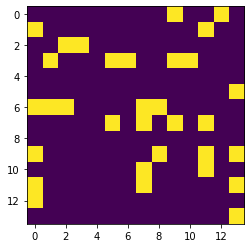

tensor(0.1893)

In [314]:
a = torch.randn((1,1,14,14))
a[a<1] = 0
a[a>1] = 1
plt.imshow(a.squeeze().numpy())
plt.show()
torch.sum(a)/169

## 竖向

In [131]:
maxp = nn.MaxPool2d(kernel_size = (2,1), stride = 1, padding = 0).cuda()
minp = MinPool(kernel_size = (2,1), stride = 1, padding = 0).cuda()

In [132]:
a_pad = torch.nn.functional.pad(a, (0, 0, 1, 1))
ans = minp(a_pad)
#ans = torch.nn.functional.pad(ans, (0, 0, 0, 0))
ans1 = maxp(ans)
ans1.shape

torch.Size([1, 1, 14, 14])

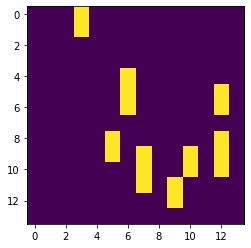

In [133]:
plt.imshow(ans1[0].squeeze().numpy())
plt.show()

## 横向

In [127]:
maxp = nn.MaxPool2d(kernel_size = (1,2), stride = 1, padding = 0).cuda()
minp = MinPool(kernel_size = (1,2), stride = 1, padding = 0).cuda()

In [128]:
a_pad = torch.nn.functional.pad(a, (1, 1, 0, 0))
ans = minp(a_pad)
#ans = torch.nn.functional.pad(ans, (1, 0, 0, 0))
ans = maxp(ans)
ans.shape

torch.Size([1, 1, 14, 14])

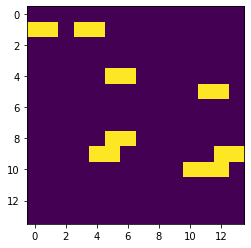

In [129]:
plt.imshow(ans.squeeze().numpy())
plt.show()

## 结果

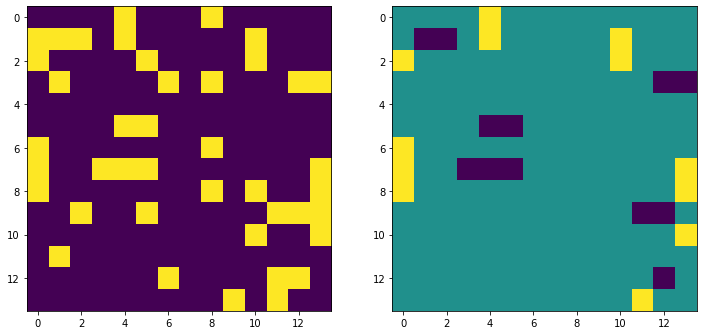

In [347]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(a.squeeze().numpy())
plt.subplot(122)
plt.imshow((ans1 - ans).squeeze().numpy())
plt.show()

# 中度密集

## 数据

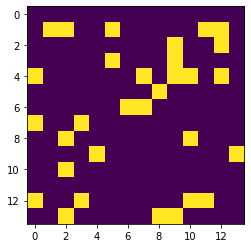

tensor(0.1834)

In [40]:
a = torch.randn((1,1,14,14))
a[a<0.9] = 0
a[a>0.9] = 1
plt.imshow(a.squeeze().numpy())
plt.show()
torch.sum(a)/169

## 竖向

In [349]:
maxp = nn.MaxPool2d(kernel_size = (2,1), stride = 1, padding = 0).cuda()
minp = MinPool(kernel_size = (2,1), stride = 1, padding = 0).cuda()

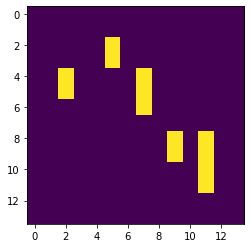

torch.Size([1, 1, 14, 14])

In [350]:
a_pad = torch.nn.functional.pad(a, (0, 0, 1, 1))
ans = minp(a_pad)
#ans = torch.nn.functional.pad(ans, (0, 0, 1, 0))
ans1 = maxp(ans)
plt.imshow(ans1.squeeze().numpy())
plt.show()
ans1.shape

## 横向

In [351]:
maxp = nn.MaxPool2d(kernel_size = (1,2), stride = 1, padding = 0).cuda()
minp = MinPool(kernel_size = (1,2), stride = 1, padding = 0).cuda()

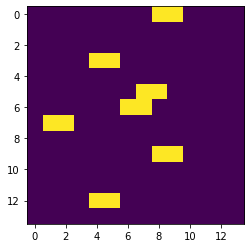

(torch.Size([1, 1, 14, 14]), torch.Size([1, 1, 14, 14]))

In [352]:
a_pad = torch.nn.functional.pad(a, (1, 1, 0, 0))
ans = minp(a_pad)
#ans = torch.nn.functional.pad(ans, (1, 0, 0, 0))
ans = maxp(ans)
plt.imshow(ans.squeeze().numpy())
plt.show()
a.shape, ans.shape

## 结果

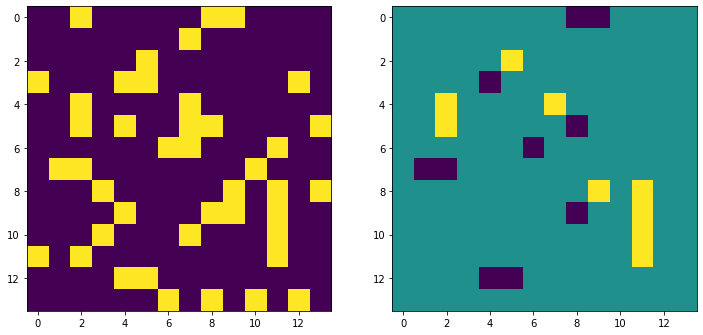

In [354]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(a.squeeze().numpy())
plt.subplot(122)
plt.imshow((ans1 + ans).squeeze().numpy())
plt.show()

# 高度密集

## 数据

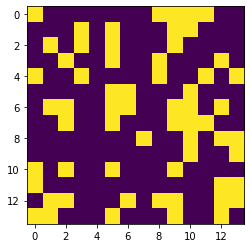

tensor(0.3163)

In [76]:
a = torch.randn((1,1,14,14))
a[a<0.5] = 0
a[a>0.5] = 1
plt.imshow(a.squeeze().numpy())
plt.show()
torch.sum(a)/196

## 测试

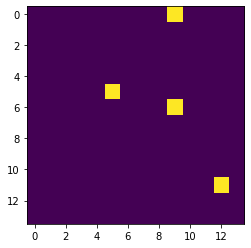

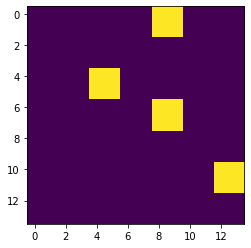

torch.Size([1, 1, 14, 14])

In [77]:
maxp = nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0).cuda()
minp = MinPool(kernel_size = 2, stride = 1, padding = 0).cuda()
a_pad = torch.nn.functional.pad(a, (0, 1, 0, 1))
ans = minp(a_pad)
#ans = minp1(ans)
plt.imshow(ans.squeeze().numpy())
plt.show()
ans = up(ans)
ans = maxp(ans)
ans = maxp(ans)
ans = up(ans)
plt.imshow(ans.squeeze().numpy())
plt.show()
ans.shape

## 结果

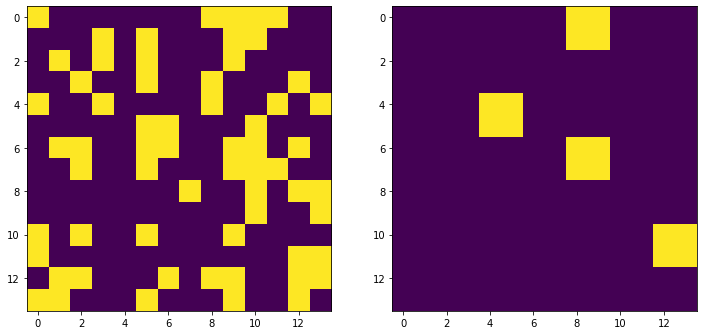

(torch.Size([1, 1, 14, 14]), torch.Size([1, 1, 14, 14]))

In [78]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(a.squeeze().numpy())
plt.subplot(122)
plt.imshow((ans).squeeze().numpy())
plt.show()
a.shape, ans.shape

# pipline

In [25]:
class MinPool(nn.Module):
    def __init__(self, kernel_size, ndim=2, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False):
        super(MinPool, self).__init__()
        self.pool = getattr(nn, f'MaxPool{ndim}d')(kernel_size=kernel_size, stride=stride, padding=padding, dilation=dilation,
                                                  return_indices=return_indices, ceil_mode=ceil_mode)
    def forward(self, x):
        x = self.pool(-x)
        return -x

In [140]:
@torch.no_grad()
class ApprConSolution(nn.Module):
    # Approximate connected solution
    def __init__(self, scale = 2):
        super().__init__()
        self.up = nn.Upsample(scale_factor=scale)
        self.thre = 0.3# [0 - 0.2 ,0.2 - 0.3 , 0.3 - 1] small middle big
        self.magic_number = 169 # 13 * 13
        self.few_dilate_col = nn.MaxPool2d(kernel_size = (2,1), stride = 1, padding = 0)
        self.few_erode_col = MinPool(kernel_size = (2,1), stride = 1, padding = 0)
        self.few_dilate_raw = nn.MaxPool2d(kernel_size = (1,2), stride = 1, padding = 0)
        self.few_erode_raw = MinPool(kernel_size = (1,2), stride = 1, padding = 0)
        self.dense_dilate = nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
        self.dense_erode = MinPool(kernel_size = 2, stride = 1, padding = 0)
    
    def forward_dense(self, x):
        # print("call forward dense")
        # pad first
        x_pad = torch.nn.functional.pad(x, (0, 1, 0, 1))
        # erode x
        ans = self.dense_erode(x_pad)
        # up scale
        ans = self.up(ans)
        
        # enchance the max 
        ans = self.dense_dilate(ans)
        ans = self.dense_dilate(ans)
        ans = self.up(ans)
        return ans
        
    def forward_few(self,x):
        #print("call forward few")
        # pad in different direction
        a_pad = torch.nn.functional.pad(x, (0, 0, 1, 1))
        ans = self.few_erode_col(a_pad)
        ans_col = self.few_dilate_col(ans)
        
        a_pad = torch.nn.functional.pad(x, (1, 1, 0, 0))
        ans = self.few_erode_raw(a_pad)
        ans_raw = self.few_dilate_raw(ans)
        return ans_col + ans_raw
        
    def forward(self,x):
        B,C,W,H = x.shape
        density_rate = torch.sum(x)/self.magic_number # better more then 14 * 14
        # print(density_rate)
        if density_rate < self.thre :
            # print("here")
            activate_mask = self.forward_few(x)
        else:
            activate_mask = self.forward_dense(x)
        if torch.sum(activate_mask) == 0:
            return x
        return activate_mask

In [141]:
acs_filter = ApprConSolution()

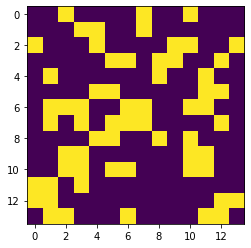

tensor(0.3163)

In [93]:
a = torch.randn((1,1,14,14))
a[a<0.5] = 0
a[a>0.5] = 1
plt.imshow(a.squeeze().numpy())
plt.show()
torch.sum(a)/196

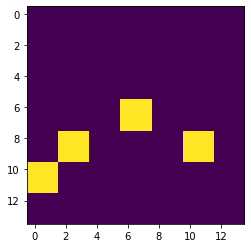

In [94]:
ans = acs_filter(a)
plt.imshow(ans.squeeze().numpy())
plt.show()

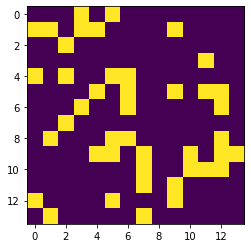

tensor(0.2194)

In [112]:
a = torch.randn((1,1,14,14))
a[a<1] = 0
a[a>1] = 1
plt.imshow(a.squeeze().numpy())
plt.show()
torch.sum(a)/196

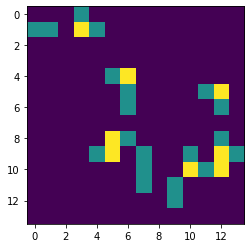

In [144]:
ans = acs_filter(a)
plt.imshow(ans.squeeze().numpy())
plt.show()